#Spooky Author Identification

As I scurried across the candlelit chamber, manuscripts in hand, I thought I'd made it. Nothing would be able to hurt me anymore. Little did I know there was one last fright lurking around the corner.

DING! My phone pinged me with a disturbing notification. It was Will, the scariest of Kaggle moderators, sharing news of another data leak.

"ph’nglui mglw’nafh Cthulhu R’lyeh wgah’nagl fhtagn!" I cried as I clumsily dropped my crate of unbound, spooky books. Pages scattered across the chamber floor. How will I ever figure out how to put them back together according to the authors who wrote them? Or are they lost, forevermore? Wait, I thought... I know, machine learning!

In this year's Halloween playground competition, you're challenged to predict the author of excerpts from horror stories by Edgar Allan Poe, Mary Shelley, and HP Lovecraft. We're encouraging you (with cash prizes!) to share your insights in the competition's discussion forum and code in Kernels. We've designated prizes to reward authors of kernels and discussion threads that are particularly valuable to the community. Click the "Prizes" tab on this overview page to learn more.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [5]:
df['author'].value_counts()

,count
author,
EAP,7900
MWS,6044
HPL,5635


In [7]:
d={'EAP':0,'MWS':1,'HPL':2}
df['author']=df['author'].map(d)

In [9]:
df['text'][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [10]:
df['text'] = df['text'].str.lower()  # Küçük harfe çevir
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)  # Özel karakterleri kaldır
df['text'] = df['text'].str.replace('\n', '')  # Yeni satırları kaldır
df['text'] = df['text'].str.replace('\d+', '', regex=True)  # Sayıları kaldır
df['text'] = df['text'].str.replace('\'', '')  # Tek tırnakları kaldır
df['text'] = df['text'].str.replace('\r', '')  # Carriage return'u kaldır

In [11]:
df['text'][0]

'this process however afforded me no means of ascertaining the dimensions of my dungeon as i might make its circuit and return to the point whence i set out without being aware of the fact so perfectly uniform seemed the wall'

In [12]:
df.isnull().sum()

,0
id,0
text,0
author,0


In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from PIL import Image
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [15]:
def wc(data, bgcolor):
    plt.figure(figsize=(10, 10))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=None, contour_width=3, contour_color='white')
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [16]:
EAP=df[df['author']==0]['text']
MWS=df[df['author']==1]['text']
HPL=df[df['author']==2]['text']

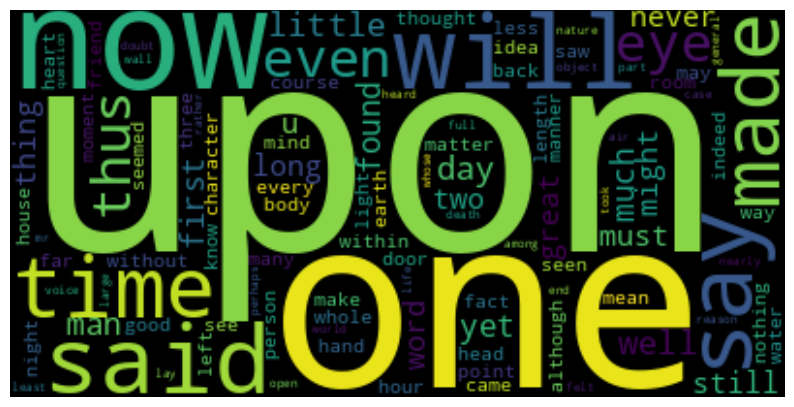

In [17]:
wc(EAP,'black')

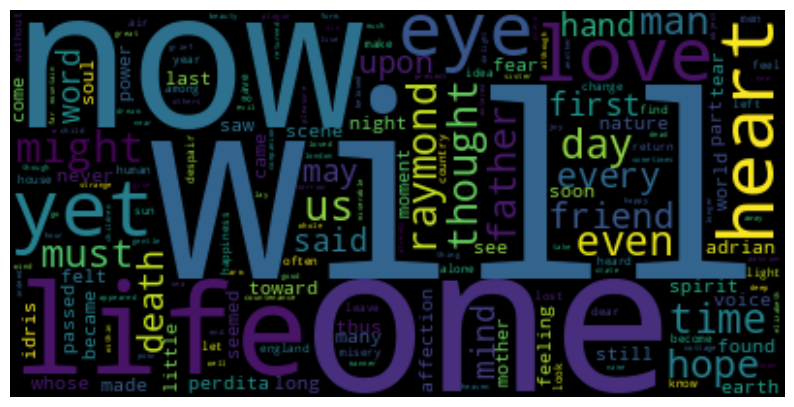

In [18]:
wc(MWS,'black')

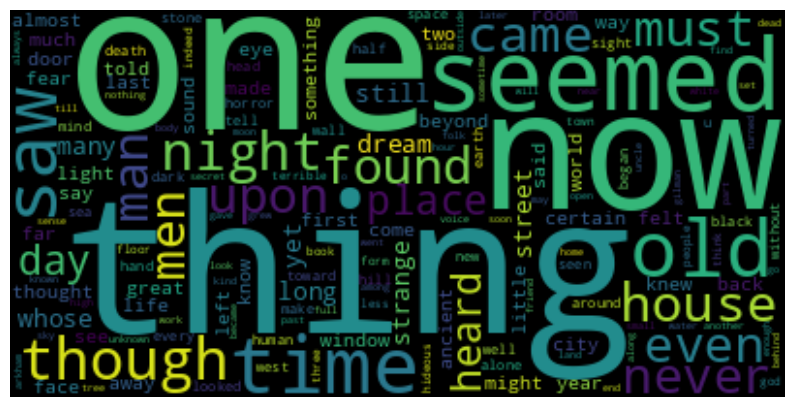

In [19]:
wc(HPL'black')

In [20]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
def lemmafn(text):

    words=TextBlob(text).words

    return[pr.stem(word) for word in words]

In [24]:
vect = CountVectorizer(ngram_range=(1,2),max_features=20000,analyzer=lemmafn)

In [25]:
x=df['text']
y=df['author']

In [26]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [27]:
x=vect.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [28]:
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier",
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")

    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")

    return metrics.drop("Model", axis=1)

In [30]:
algo_test(x, y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[2081  169   85]
 [ 303 1500   59]
 [ 319  112 1246]]
LogisticRegression()  modeli eğitiliyor!..


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[2010  186  139]
 [ 288 1471  103]
 [ 266  127 1284]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[1433  456  446]
 [ 594  912  356]
 [ 554  315  808]]
RandomForestClassifier()  modeli eğitiliyor!..
[[2075  189   71]
 [ 609 1135  118]
 [ 640  123  914]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[1996  180  159]
 [ 670 1015  177]
 [ 673  122  882]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[1974  316   45]
 [1164  659   39]
 [1331  240  106]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[1754  333  248]
 [ 644 1001  217]
 [ 677  179  821]]
MultinomialNB()  modeli eğitiliyor!..
[[1911  284  140]
 [ 165 1606   91]
 [ 187  128 1362]]
Eğitim tamamlandı.
En başarılı model:  MultinomialNB
Confusion Matrix:
[[1911  284  140]
 [ 165 1606   91]
 [ 187  128 1362]]
classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2335
           1       0.80      0.86      0.83      1862
           2       0.85      0.8

,Accuracy,Precision,Recall,F1
MultinomialNB,0.830609,0.830609,0.830609,0.830609
BernoulliNB,0.821757,0.821757,0.821757,0.821757
LogisticRegression,0.811202,0.811202,0.811202,0.811202
RandomForestClassifier,0.702077,0.702077,0.702077,0.702077
GradientBoostingClassifier,0.662751,0.662751,0.662751,0.662751
AdaBoostClassifier,0.608784,0.608784,0.608784,0.608784
DecisionTreeClassifier,0.536772,0.536772,0.536772,0.536772
KNeighborsClassifier,0.466292,0.466292,0.466292,0.466292
